# Multiple Linear Regression - Green Credit

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

## Load the data

In [5]:
# Load the data from a .csv in the same folder
raw_data = pd.read_excel("Data.xlsx", sheet_name="Summary")
# Explore raw data columns
raw_data
# print(dir(data.columns))

,Year,GDP,GC,FDI,GE,INF,COV,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2015.0,6.987167,1.521256,4.9,1502189.0,0.631201,0.0,NaN,NaN,Green Credit (%GDP),FDI (%GDP),Gov Expenditure (billion VND)
1,2016.0,6.690009,1.539959,4.9,1574448.0,2.668248,0.0,NaN,Green Credit (%GDP),1,NaN,NaN
2,2017.0,6.940188,2.765978,5.0,1355034.0,3.520257,0.0,NaN,FDI (%GDP),-0.828576,1,NaN
3,2018.0,7.464991,3.268774,5.0,1435435.0,3.539628,0.0,NaN,Gov Expenditure (billion VND),0.641985,-0.806624,1
4,2019.0,7.359281,3.564198,4.8,1526893.0,2.795824,0.0,NaN,"Inflation, consumer prices (annual %)",0.310439,0.133949,0.046421
5,2020.0,2.865412,3.717134,4.6,1709524.0,3.220934,1.0,NaN,NaN,NaN,NaN,NaN
6,2021.0,2.561551,4.429304,4.3,1708088.0,1.834716,1.0,NaN,NaN,NaN,NaN,NaN
7,2022.0,8.019798,4.197415,4.4,2158100.0,3.156508,0.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing
### Determining the variables of interest

In [7]:
# Drop columns 7 to 11
data = raw_data.drop(raw_data.columns[7:12], axis=1)

# Drop rows 8 to the end
data = data.drop(data.index[8:], axis=0)

# Let's check the descriptives without excessive columns
data.describe(include='all')

,Year,GDP,GC,FDI,GE,INF,COV
count,8.00000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.00000
mean,2018.50000,6.111050,3.125502,4.737500,1.621214e+06,2.670914,0.25000
std,2.44949,2.136683,1.110258,0.272226,2.490578e+05,0.992086,0.46291
min,2015.00000,2.561551,1.521256,4.300000,1.355034e+06,0.631201,0.00000
25%,2016.75000,5.733860,2.459473,4.550000,1.485500e+06,2.459865,0.00000
50%,2018.50000,6.963678,3.416486,4.850000,1.550670e+06,2.976166,0.00000
75%,2020.25000,7.385708,3.837204,4.925000,1.708447e+06,3.295765,0.25000
max,2022.00000,8.019798,4.429304,5.000000,2.158100e+06,3.539628,1.00000


### Dealing with missing values
There is no missing values

## Checking the OLS assumptions
### Create dummy variables

In [8]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [9]:
# Here's the result
data_with_dummies

,Year,GDP,GC,FDI,GE,INF,COV
0,2015.0,6.987167,1.521256,4.9,1502189.0,0.631201,0.0
1,2016.0,6.690009,1.539959,4.9,1574448.0,2.668248,0.0
2,2017.0,6.940188,2.765978,5.0,1355034.0,3.520257,0.0
3,2018.0,7.464991,3.268774,5.0,1435435.0,3.539628,0.0
4,2019.0,7.359281,3.564198,4.8,1526893.0,2.795824,0.0
5,2020.0,2.865412,3.717134,4.6,1709524.0,3.220934,1.0
6,2021.0,2.561551,4.429304,4.3,1708088.0,1.834716,1.0
7,2022.0,8.019798,4.197415,4.4,2158100.0,3.156508,0.0


### Linearity

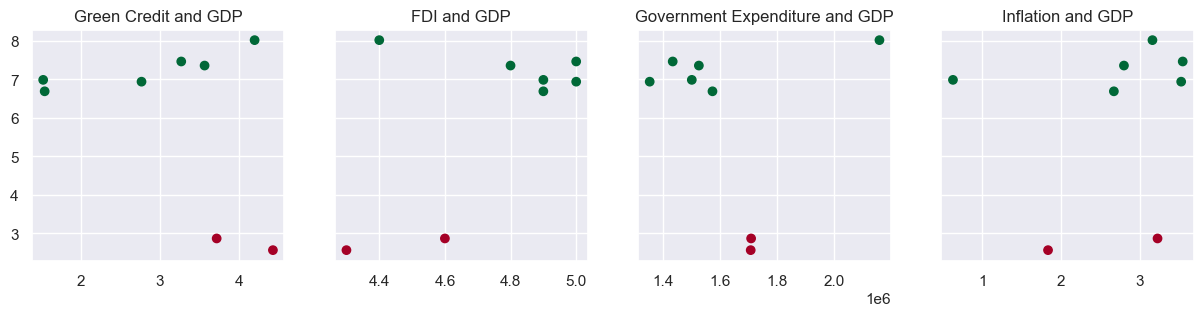

In [10]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_with_dummies['GC'],data_with_dummies['GDP'], c=data_with_dummies['COV'],cmap='RdYlGn_r')
ax1.set_title('Green Credit and GDP')
ax2.scatter(data_with_dummies['FDI'],data_with_dummies['GDP'], c=data_with_dummies['COV'],cmap='RdYlGn_r')
ax2.set_title('FDI and GDP')
ax3.scatter(data_with_dummies['GE'],data_with_dummies['GDP'], c=data_with_dummies['COV'],cmap='RdYlGn_r')
ax3.set_title('Government Expenditure and GDP')
ax4.scatter(data_with_dummies['INF'],data_with_dummies['GDP'], c=data_with_dummies['COV'],cmap='RdYlGn_r')
ax4.set_title('Inflation and GDP')

plt.show()

### Multicollinearity

In [11]:
# Let's quickly see the columns of our data frame
data_with_dummies.columns.values

array(['Year', 'GDP', 'GC', 'FDI', 'GE', 'INF', 'COV'], dtype=object)

In [12]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_with_dummies[['GC', 'FDI', 'GE', 'INF', 'COV']]
variables = sm.add_constant(variables)

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif = vif[1:]

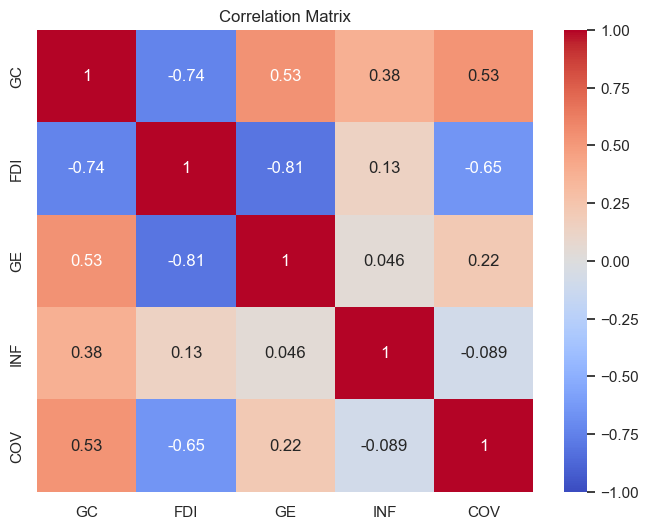

In [13]:
# Explore the correlation matrix
correlation_matrix = variables.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Let's explore the result
vif

,VIF,Features
1,6.939020,GC
2,27.499973,FDI
3,9.616403,GE
4,3.613544,INF
5,4.131105,COV


In [15]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_with_dummies.drop(['FDI'],axis=1)

**Check VIF after dropping**

In [16]:
variables = data_no_multicollinearity[['GC', 'GE', 'INF', 'COV']]
variables = sm.add_constant(variables)

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif = vif[1:]

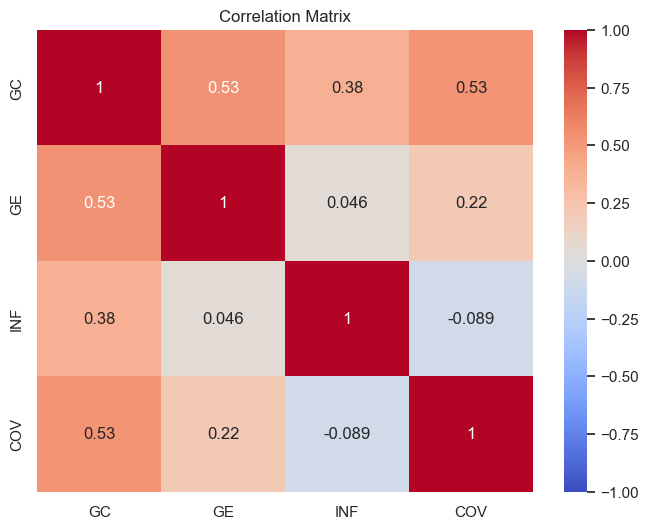

In [17]:
correlation_matrix = variables.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Let's explore the result
vif

,VIF,Features
1,2.633840,GC
2,1.503300,GE
3,1.433662,INF
4,1.649216,COV


### Rearrange a bit

In [19]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_no_multicollinearity.columns.values

array(['Year', 'GDP', 'GC', 'GE', 'INF', 'COV'], dtype=object)

In [20]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['GDP', 'GC', 'GE', 'INF', 'COV']

In [21]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_no_multicollinearity[cols]
data_preprocessed.head()

,GDP,GC,GE,INF,COV
0,6.987167,1.521256,1502189.0,0.631201,0.0
1,6.690009,1.539959,1574448.0,2.668248,0.0
2,6.940188,2.765978,1355034.0,3.520257,0.0
3,7.464991,3.268774,1435435.0,3.539628,0.0
4,7.359281,3.564198,1526893.0,2.795824,0.0


## Create the regression

### Declare the dependent and the independent variables

In [22]:
y = data_preprocessed ['GDP']
x1 = data_preprocessed [['GC', 'GE', 'INF', 'COV']]

### Regression

In [23]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

D:\quang\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     97.98
Date:                Tue, 14 Nov 2023   Prob (F-statistic):            0.00165
Time:                        15:26:51   Log-Likelihood:                 2.6289
No. Observations:                   8   AIC:                             4.742
Df Residuals:                       3   BIC:                             5.139
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3310      0.784      6.796      0.007       2.835       7.827
GC             0.2459      0.157      1.564      0.216      -0.254       0.746
GE          7.236e-07   5.29e-07      1.367      0.265   -9.61e-07    2.41e-06
INF            0.0257      0.130      0.198      0.856      -0.387       0.439
COV           -4.9204      0.298    -16.496      0.000      -5.870      -3.971
==============================================================================
Omnibus:                        2.557   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                0.825
Skew:                          -0.019   Prob(JB):                        0.662
Kurtosis:                       1.427   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(results.resid, x)
# Output the results
print(f"Breusch-Pagan Test p-value: {p_value}")

# Check the p-value to determine if heteroscedasticity is present
if p_value < 0.05:
    print("Heteroscedasticity is present (reject null hypothesis)")
else:
    print("Heteroscedasticity is not present (fail to reject null hypothesis)")

Breusch-Pagan Test p-value: 0.20650453204631578
Heteroscedasticity is not present (fail to reject null hypothesis)


In [25]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(results.resid)

print(f"Durbin-Watson Statistic: {dw_statistic}")

if dw_statistic < 1:
    print("Positive autocorrelation may be present.")
elif dw_statistic > 3:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")


Durbin-Watson Statistic: 2.6859362431116103
No significant autocorrelation detected.
